<a href="https://colab.research.google.com/github/marcinBrzew/Todo/blob/master/Bollinger_Bands_%2B_SMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf 
import  numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.graph_objects as go

In [53]:
df=yf.download(tickers='EURUSD=X', period='1d', interval='5m')
df['SMA']=df.Close.rolling(window=14).mean()
df['EMA']=df.Close.ewm(span=6).mean()
df['stddev']=df.Close.rolling(window=14).std()
df['Upper']=df.SMA +2*df.stddev
df['Lower']=df.SMA -2*df.stddev
df=df.dropna()



[*********************100%***********************]  1 of 1 completed


In [27]:

buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
   if df.Open[i]<df.Close[i]: #Zielona Swieca 
      if df.Open[i] <df.EMA[i]:
        if df.Close[i]>df.EMA[i]:
          if df.EMA[i-1]<df.EMA[i]:
            if df.SMA[i]<df.EMA[i]:
              buys.append(i)
              open_pos=True
   elif df.Open[i]>df.Close[i]: #Czerwona Swieca 
      if df.Open[i] >df.EMA[i]:
        if df.Close[i]<df.EMA[i]:
          if df.EMA[i-1]>df.EMA[i]:
            if df.Close[i]>df.Lower[i]:           
              sells.append(i)
              open_pos=True


In [30]:
# Only candles crossed by EMA and SMA
buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
   if df.Open[i]<df.Close[i]: #Zielona Swieca 
      if df.Open[i] <df.EMA[i]:
        if df.Close[i]>df.EMA[i]:
          if df.EMA[i-1]<df.EMA[i]:
            if df.Open[i] <df.SMA[i]:
              if df.Close[i]>df.SMA[i]:
                buys.append(i)
                open_pos=True
   elif df.Open[i]>df.Close[i]: #Czerwona Swieca 
      if df.Open[i] >df.EMA[i]:
        if df.Close[i]<df.EMA[i]:
          if df.EMA[i-1]>df.EMA[i]:
            if df.Close[i]>df.Lower[i]:
              if df.Open[i] >df.SMA[i]:
                if df.Close[i]<df.SMA[i]:           
                  sells.append(i)
                  open_pos=True

In [64]:
# Only green candles Over SMA
buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
   if df.Open[i]<df.Close[i]: #Zielona Swieca 
      if df.Open[i] <df.EMA[i]:#EMA przechodzi przez swiece 
        if df.Close[i]>df.EMA[i]:
          if df.SMA[i-1]<df.SMA[i]: #SMA jest Rosnace 
            if df.Close[i]> df.SMA[i]:#SMA jest ponizej Close
              buys.append(i)
              open_pos=True
   elif df.Open[i]>df.Close[i]: #Czerwona Swieca 
      if df.Open[i] >df.EMA[i]:#EMA przechodzi przez Swiece
        if df.Close[i]<df.EMA[i]:
          if df.SMA[i-1]>df.SMA[i]:# SMA jest Malejace
            if df.Close[i]<df.SMA[i]:#Swieca jest pod SMA         
              sells.append(i)
              open_pos=True

In [65]:
buys
sells

[2, 12, 50, 71, 111, 117, 119, 130, 131, 140, 142, 151, 155]

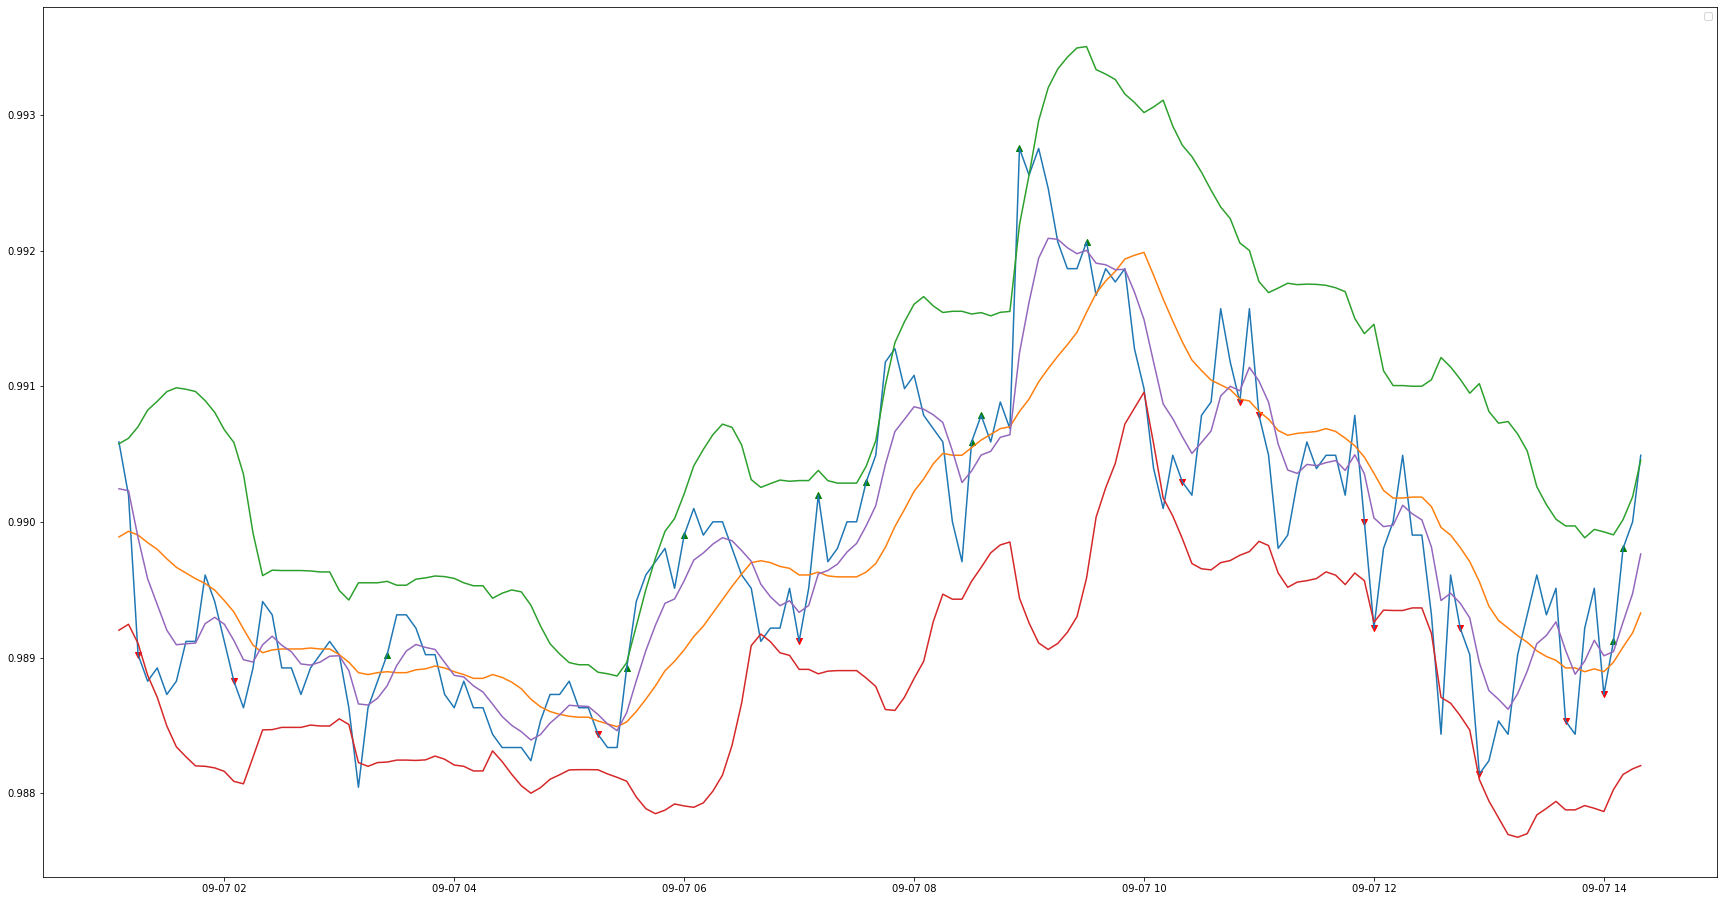

In [66]:
plt.figure(figsize=(30,16))
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='^',color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='v',color='r')
plt.plot(df[['Close','SMA','Upper','Lower','EMA']])
plt.legend()
plt.show()
fig = go.Figure(data=[go.Candlestick(
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.show()